# Convolutional Autoencoder

Sticking with the MNIST dataset, let's improve our autoencoder's performance using convolutional layers. Again, loading modules and the data.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
from scipy.misc import imsave
from scipy.misc import imresize
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
# from tensorflow_vgg import vgg16|
import collections
import time
import math

In [10]:
GEI_1f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_1f_path', mode='rb'))

In [12]:
len(GEI_1f_path)

91112

# Import GEI dataset 

(128, 88)


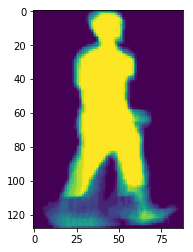

In [6]:
img = imread('{}'.format(os.path.join('./OULP-C1V2_Pack/OULP-GEI-(88x128)-10f/Seq00/0000024', '0000024_55_GEI_10f.png')))
# img = imresize(img, [64, 64], interp='nearest')
print(img.shape)
plt.imshow(img)
plt.show()

In [102]:
# Create Training Data
path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-5f_5/Seq01'
Seq_10f_list = os.listdir(path)
# Seq_10f_list.remove('.DS_Store')

Seq = []
for each_seq in Seq_10f_list:
    seq_path = os.path.join(path, each_seq)
    GEI = []
    for each_GEI in os.listdir(seq_path):
        img = imread('{}'.format(os.path.join(seq_path, each_GEI)))
        img = imresize(img, [64, 64], interp='nearest')
        GEI.append(img)
    Seq.append(np.array(GEI))
Seq = np.array(Seq)
Seq1 = np.ndarray([len(Seq),4,64,64], dtype=float)
for ii, each in enumerate(Seq):
    Seq1[ii] = each

In [103]:
with open('../gait_data/OULP_GEI/GEI64x64_5f_5_Seq01', 'wb') as f:
    np.save(f, Seq1)

# Checkpoint 1

In [2]:
# Create Training Data
Subjects_list = np.load(open(r'../gait_data/OULP_GEI/GEI_subjects_list', mode='rb'))

# GEI_1f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_1f_path', mode='rb'))
# GEI_3f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_3f_path', mode='rb'))
# GEI_5f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_5f_path', mode='rb'))
# GEI_8f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_8f_path', mode='rb'))
GEI_10f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_10f_path', mode='rb'))
GEI_13f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_13f_path', mode='rb'))
# GEI_15f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_15f_path', mode='rb'))
# GEI_20f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_20f_path', mode='rb'))
# GEI_full_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_full_path', mode='rb'))

# get train, validation, test data
train_x = np.array([])
train_y = np.array([])

val_x = np.array([])
val_y = np.array([])

test_x = np.array([])
test_y = np.array([])

for ii in range(0, 28):
    train_x = np.concatenate([train_x, GEI_10f_path[0 + ii*3146 : 2146 + ii*3146]], axis=0) 
    train_y = np.concatenate([train_y, GEI_13f_path[0 + ii*3146 : 2146 + ii*3146]], axis=0)
        
    val_x = np.concatenate([val_x, GEI_10f_path[2146 + ii*3146 : 2646 + ii*3146]], axis=0) 
    val_y = np.concatenate([val_y, GEI_13f_path[2146 + ii*3146 : 2646 + ii*3146]], axis=0)
        
    test_x = np.concatenate([test_x, GEI_10f_path[2646 + ii*3146 : 3146 + ii*3146]], axis=0) 
    test_y = np.concatenate([test_y, GEI_13f_path[2646 + ii*3146 : 3146 + ii*3146]], axis=0)

train_x, train_y = shuffle(train_x, train_y)
val_x, val_y = shuffle(val_x, val_y)
test_x, test_y = shuffle(test_x, test_y)

In [2]:
# gallery_8f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_1_Seq00', mode='rb'))
# probe_8f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_1_Seq01', mode='rb'))
# gallery_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_1_Seq00', mode='rb'))
# probe_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_1_Seq01', mode='rb'))

# gallery_8f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_2_Seq00', mode='rb'))
# probe_8f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_2_Seq01', mode='rb'))
# gallery_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq00', mode='rb'))
# probe_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq01', mode='rb'))

# gallery_8f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_3_Seq00', mode='rb'))
# probe_8f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_3_Seq01', mode='rb'))
# gallery_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq00', mode='rb'))
# probe_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq01', mode='rb'))

# gallery_8f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_4_Seq00', mode='rb'))
# probe_8f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_4_Seq01', mode='rb'))
# gallery_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq00', mode='rb'))
# probe_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq01', mode='rb'))

# gallery_8f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_5_Seq00', mode='rb'))
# probe_8f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_5_Seq01', mode='rb'))
# gallery_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq00', mode='rb'))
# probe_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq01', mode='rb'))

# gallery_8f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_6_Seq00', mode='rb'))
# probe_8f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_6_Seq01', mode='rb'))
# gallery_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq00', mode='rb'))
# probe_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq01', mode='rb'))

In [3]:
# gallery_8f = gallery_8f/float(255)
# probe_8f = probe_8f/float(255)
# gallery_10f = gallery_10f/float(255)
# probe_10f = probe_10f/float(255)

# gallery_8f_2 = gallery_8f_2/float(255)
# probe_8f_2 = probe_8f_2/float(255)
# gallery_10f_2 = gallery_10f_2/float(255)
# probe_10f_2 = probe_10f_2/float(255)

# gallery_8f_3 = gallery_8f_3/float(255)
# probe_8f_3 = probe_8f_3/float(255)
# gallery_10f_3 = gallery_10f_3/float(255)
# probe_10f_3 = probe_10f_3/float(255)

# gallery_8f_4 = gallery_8f_4/float(255)
# probe_8f_4 = probe_8f_4/float(255)
# gallery_10f_4 = gallery_10f_4/float(255)
# probe_10f_4 = probe_10f_4/float(255)

# gallery_8f_5 = gallery_8f_5/float(255)
# probe_8f_5 = probe_8f_5/float(255)
# gallery_10f_5 = gallery_10f_5/float(255)
# probe_10f_5 = probe_10f_5/float(255)

# gallery_8f_6 = gallery_8f_6/float(255)
# probe_8f_6 = probe_8f_6/float(255)
# gallery_10f_6 = gallery_10f_6/float(255)
# probe_10f_6 = probe_10f_6/float(255)

<br><br><br><br><br><br><br><br><br>

In [3]:
# # Train X
# train_x = np.concatenate([gallery_8f[:2146, 3], probe_8f[:2146, 3], gallery_8f_2[:2146, 3], 
#                           probe_8f_2[:2146, 3], gallery_8f_3[:2146, 3], probe_8f_3[:2146, 3],
#                           gallery_8f_4[:2146, 3], probe_8f_4[:2146, 3], gallery_8f_5[:2146, 3], 
#                           probe_8f_5[:2146, 3], gallery_8f_6[:2146, 3], probe_8f_6[:2146, 3]], axis=0)
# train_x = np.reshape(train_x, [train_x.shape[0], train_x.shape[1], train_x.shape[2], 1])
# # Train Y
# train_y = np.concatenate([gallery_10f[:2146, 3], probe_10f[:2146, 3], gallery_10f_2[:2146, 3], 
#                           probe_10f_2[:2146, 3], gallery_10f_3[:2146, 3], probe_10f_3[:2146, 3],
#                           gallery_10f_4[:2146, 3], probe_10f_4[:2146, 3], gallery_10f_5[:2146, 3], 
#                           probe_10f_5[:2146, 3], gallery_10f_6[:2146, 3], probe_10f_6[:2146, 3]], axis=0)
# train_y = np.reshape(train_y, [train_y.shape[0], train_y.shape[1], train_y.shape[2], 1])
# print('train_x', train_x.shape, 'train_y', train_y.shape)

# # Val X
# val_x = np.concatenate([gallery_8f[2146:2646, 3], gallery_8f_2[2146:2646, 3], gallery_8f_3[2146:2646, 3],
#                         gallery_8f_4[2146:2646, 3], gallery_8f_5[2146:2646, 3], gallery_8f_6[2146:2646, 3],
#                         probe_8f[2146:2646, 3], probe_8f_2[2146:2646, 3], probe_8f_3[2146:2646, 3], 
#                         probe_8f_4[2146:2646, 3], probe_8f_5[2146:2646, 3], probe_8f_6[2146:2646, 3]], axis=0)
# val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# # Val Y
# val_y = np.concatenate([gallery_10f[2146:2646, 3], gallery_10f_2[2146:2646, 3], gallery_10f_3[2146:2646, 3], 
#                         gallery_10f_4[2146:2646, 3], gallery_10f_5[2146:2646, 3], gallery_10f_6[2146:2646, 3], 
#                         probe_10f[2146:2646, 3], probe_10f_2[2146:2646, 3], probe_10f_3[2146:2646, 3], 
#                         probe_10f_4[2146:2646, 3], probe_10f_5[2146:2646, 3], probe_10f_6[2146:2646, 3]], axis=0)
# val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
# print('val_x', val_x.shape, 'val_y', val_y.shape)

# # Test X
# test_x = np.concatenate([gallery_8f[2646:, 3], gallery_8f_2[2646:, 3], gallery_8f_3[2646:, 3],
#                          gallery_8f_4[2646:, 3], gallery_8f_5[2646:, 3], gallery_8f_6[2646:, 3], 
#                          probe_8f[2646:, 3], probe_8f_2[2646:, 3], probe_8f_3[2646:, 3],
#                          probe_8f_4[2646:, 3], probe_8f_5[2646:, 3], probe_8f_6[2646:, 3]], 
#                         axis=0)
# test_x = np.reshape(test_x, [test_x.shape[0], test_x.shape[1], test_x.shape[2], 1])
# # Test Y
# test_y = np.concatenate([gallery_10f[2646:, 3], gallery_10f_2[2646:, 3], gallery_10f_3[2646:, 3], 
#                          gallery_10f_4[2646:, 3], gallery_10f_5[2646:, 3], gallery_10f_6[2646:, 3], 
#                          probe_10f[2646:, 3], probe_10f_2[2646:, 3], probe_10f_3[2646:, 3], probe_10f_4[2646:, 3], 
#                          probe_10f_5[2646:, 3], probe_10f_6[2646:, 3]], axis=0)
# test_y = np.reshape(test_y, [test_y.shape[0], test_y.shape[1], test_y.shape[2], 1])
# print('test_x', test_x.shape, 'test_y', test_y.shape)

# Create Graph

In [3]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/float(255)
        target_batch = np.array(target_batch)/float(255)
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield shuffle(data_batch, target_batch)

def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

In [4]:
def build_inputs_outputs():
    inputs_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='inputs_1')
    targets_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='targets_1')
    
    return inputs_1, targets_1

def conv_layer(inputs_, weights_name, bias_name, conv_name, pool_name, bn_name, relu_name, add_bacth_norm=True, is_training=True, 
               set_stddev=0.03, out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), pool_size=(2,2), pool_strides=(2,2), 
               keep_prob=0.5):
    ### Encoder
    # e.g. out_dim: 8; kern_size: (3,3); pool_size: (2,2); strides: (2,2);
        
    # filter:[filter_height, filter_width, in_channels, out_channels]
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         inputs_.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name) 
    
    # Set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    # input:[batch, in_height, in_width, in_channels]
    conv2d = tf.nn.bias_add(tf.nn.conv2d(inputs_, weight, stride, padding='SAME', name=conv_name), bias)
    
    # add activation function
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    # add Max pooling
    conv2d = tf.nn.max_pool(conv2d, [1,pool_size[0],pool_size[1],1],\
                                    [1,pool_strides[0],pool_strides[1],1], padding='SAME', name=pool_name)   
    # Now 28x28x
    if add_bacth_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
        
    conv2d_maxpool = tf.layers.dropout(conv2d, rate=keep_prob)
        
    return conv2d_maxpool

#     # Now 14x14x16
#     conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
#     # Now 7x7x8
#     conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 7x7x8
#     encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
#     # Now 4x4x8

def deconv_layer(encoded, up_name, weights_name, bias_name, de_conv_name, bn_name, relu_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, up_size=[(2,2),(4,4),(5,5),(6,6)], out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), keep_prob=0.5):
    ### Decoder
    upsample = tf.image.resize_nearest_neighbor(encoded, up_size, name=up_name) # up_size: e.g.(7,7)
    
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         upsample.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    conv2d = tf.nn.bias_add(tf.nn.conv2d(upsample, weight, stride, padding='SAME', name=de_conv_name),\
                   bias)
    
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    return conv2d

#     # Now 7x7x8
#     upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
#     # Now 14x14x8
#     conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
#     # Now 28x28x8
#     conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 28x28x16

def output_layer(conv2d, weights_name, bias_name, logits_name, bn_name, decoded_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, out_dim=1, conv_kernsize=(3,3), conv_strides=(1,1)):
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         conv2d.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    logits = tf.nn.bias_add(tf.nn.conv2d(conv2d, weight, stride, padding='SAME', name=logits_name),\
                   bias)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    #Now 28x28x1
    decoded = tf.nn.sigmoid(logits, name=decoded_name)
    
    return logits, decoded

In [5]:
def build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
                de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)]):
    
    # reset graph
    tf.reset_default_graph()
    
    with tf.name_scope('inputs_targets'):
        inputs_1, targets_1 = build_inputs_outputs()
    
    keep_p = tf.placeholder(tf.float32, name="keep_prob")
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    training = tf.placeholder(tf.bool, name='training')
    
    with tf.name_scope('conv_layers'):
        
        maxpool_1 = conv_layer(inputs_1, 'conv_weights_1', 'bias_1', 'conv_1', 'pool_1', 'bn_1', 'relu_1', add_bacth_norm=False, 
                               is_training=training, set_stddev=std, out_dim=128, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
        maxpool_2 = conv_layer(maxpool_1, 'conv_weights_2', 'bias_2', 'conv_2', 'pool_2', 'bn_2', 'relu_2', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=64, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
        maxpool_3 = conv_layer(maxpool_2, 'conv_weights_3', 'bias_3', 'conv_3', 'pool_3', 'bn_3', 'relu_3', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=32, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
#         maxpool_4 = conv_layer(maxpool_3, 'conv_weights_4', 'bias_4', 'conv_4', 'pool_4', 'bn_4', 'relu_4', add_bacth_norm=True, 
#                                is_training=training, set_stddev=std, out_dim=8, conv_kernsize=kern_size, conv_strides=conv_strides, 
#                                pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # Now 4x4x8 as hidden layer
        
    with tf.name_scope('deconv_layers'):
        
        deconv_1 = deconv_layer(maxpool_3, 'up_1', 'deconv_weights_1', 'debias_1', 'deconv_1', 'de_bn_1', 'de_relu_1', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[0], out_dim=32, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_2 = deconv_layer(deconv_1, 'up_2', 'deconv_weights_2', 'debias_2', 'deconv_2', 'de_bn_2', 'de_relu_2', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[1], out_dim=64, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_3 = deconv_layer(deconv_2, 'up_3', 'deconv_weights_3', 'debias_3', 'deconv_3', 'de_bn_3', 'de_relu_3', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[2], out_dim=128, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
#         deconv_4 = deconv_layer(deconv_3, 'up_4', 'deconv_weights_4', 'debias_4', 'deconv_4', 'de_bn_4', 'de_relu_4', add_batch_norm=True, 
#                               is_training=training, set_stddev=std, up_size=up_size[3], out_dim=64, conv_kernsize=de_kern_size,
#                               conv_strides=de_conv_strides, keep_prob=keep_p)
        
    with tf.name_scope('output_layer'):
       
        logits, decoded = output_layer(deconv_3, 'output_weights', 'outbias_1', 'logits', 'bn', 'decoded', add_batch_norm=False, is_training=training, 
                                       set_stddev=std, out_dim=1, conv_kernsize=out_kern_size, conv_strides=out_strides)
    
    MSE = tf.reduce_mean(tf.losses.mean_squared_error(targets_1, decoded), name='MSE')
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_1, logits=logits, name='loss')
    cost = tf.reduce_mean(loss, name='cost')
#     cost = tf.losses.mean_squared_error(targets_1, decoded)
    opt = tf.train.AdamOptimizer(learning_rate).minimize(MSE)
    
    with tf.name_scope('saver'):
        saver = tf.train.Saver()
        
#     merged = tf.summary.merge_all()
    
    export_nodes = ['inputs_1', 'targets_1', 'maxpool_1', 'maxpool_2', 'maxpool_3', 'deconv_1', 'deconv_2', 
                    'deconv_3', 'training', 'logits', 'decoded', 'loss', 'cost', 'opt', 'saver', 'learning_rate', 'keep_p', 'MSE']
    
    Graph = collections.namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])
    
    return graph

In [18]:
# def get_batches(data, target, batch_size):
#     n_batches = len(data)//batch_size
#     data = data[:batch_size * n_batches]
#     target = target[:batch_size * n_batches]
#     for ii in range(0, batch_size*n_batches, batch_size):
#         data_batch = data[ii:ii + batch_size]
#         target_batch = target[ii:ii + batch_size]
        
#         yield data_batch, target_batch
        
        
# def cal_accuracy(decoded, target):
#     error = abs(decoded - target)
#     Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
#     return Acc

In [6]:
def train(model, epochs, save_string):
    
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        sess.run(tf.global_variables_initializer())
        
        iteration = 1
        mean_val_loss = 0
        mean_val_mse = 0
        mean_val_acc = 0
        count_loss_not_decrease_epochs = 0
        count_acc_not_decrease_epochs = 0
        Last_val_loss = 0
        Last_val_mse = 0
        Last_val_acc = 0
        
        last_saved_acc = 0
        val_batch_size = 50
        
        for e in range(epochs):
            for train_batch, target_batch in get_batches(train_x, train_y, batch_size):
                    
                start = time.time()
                
                feed_1 = {
                        model.inputs_1: train_batch, 
                        model.targets_1: target_batch,
                        model.keep_p: 0.5,
                        model.learning_rate: lr,
                        model.training:True
                        }

                _, decoded_img, train_mse = sess.run([model.opt, model.decoded, model.MSE], feed_dict=feed_1)
                
                train_acc = cal_accuracy(decoded_img, target_batch)
                
                if iteration%25==0:
                    end = time.time()
#                     acc = calculate_accuracy(sess, pred, target_batch, sq_length)
                    print("Epoch: {}/{},".format(e+1, epochs),' '
                          "Iteration: {},".format(iteration),' '
        
                          "Train MSE: {:.4f},".format(train_mse),' '
                          "{:.1f}s /batch.".format((end-start)/5),' '
                          "Train Accuracy: %{:.3f}".format(train_acc))

                ##############################################################
                ######################## VALIDATION ##########################
                ##############################################################
                
                if iteration%35==0:
#                     training = True
#                     validation_loss = []
                    validation_mse = []
                    validation_acc = []
                    
#                     if batch_size >= len(val_x):
#                         val_batch_size = len(val_x)
#                     else: 
#                         val_batch_size = batch_size
                        

                    for ii, (val_batch, val_target_batch) in enumerate(get_batches(val_x, val_y, val_batch_size)):
#                         print(ii, len(val_x)//val_batch_size)
                        feed_2 = {
                                model.inputs_1: val_batch,
                                model.targets_1: val_target_batch,
                                model.keep_p: 1,
                                model.training:True
                                }
                        
                        val_decoded_img, val_mse = sess.run([model.decoded, model.MSE], 
                                                                          feed_dict=feed_2)

                        val_acc = cal_accuracy(val_decoded_img, val_target_batch)
                        
                        
                        validation_mse.append(val_mse)
                        validation_acc.append(val_acc)
                    
                    
                    Last_val_mse = mean_val_mse
                    Last_val_acc = mean_val_acc
                    
                    mean_val_mse = np.mean(np.array(validation_mse))
                    mean_val_acc = np.mean(np.array(validation_acc))
                    
                    print()
                    print(
                          "Validation mse: {:.4f},".format(mean_val_mse),' '
                          "Validation accuracy: %{:.3f},".format(mean_val_acc))
#                           "maxpool_3.shape: {}.".format(max_pool_3[0].shape))
                    print()
        
                    if (mean_val_acc > 92) & (mean_val_acc > last_saved_acc):
                        model.saver.save(sess, r"{}".format(save_string)) 
                        last_saved_acc = mean_val_acc
                        print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
                        
                        
#                     if mean_val_acc > 93.2:
#                         model.saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 91:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 91.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 92.0:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 92.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 93.0:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 93.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
                ####### plot #######
#                 if iteration%500==0:
                    
#                     feed_3 = {
#                             model.inputs_1: val_x[:10],
#                             model.keep_p: 1,
#                             model.training:True
#                             }
                    
#                     fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
#                     in_imgs = val_x[:10]
#                     target_imgs = val_y[:10]
#                     reconstructed = sess.run(model.decoded, feed_dict=feed_3)

##                     plot out
#                     for images, row in zip([in_imgs, target_imgs, reconstructed], axes):
#                         for img, ax in zip(images, row):
#                             ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
#                             ax.get_xaxis().set_visible(False)
#                             ax.get_yaxis().set_visible(False)


#                     fig.tight_layout(pad=0.1)
                            
                    
                    
                    
                    
                iteration += 1
                
            # Early stopping 
#             if mean_val_acc > 89:
#                 break
#             if mean_val_Acc - Last_val_Acc <= -0.3:
#                 count_Acc_not_increase_epochs += 1
#             if Last_val_loss - mean_val_loss <= -0.01:
#                 count_loss_not_decrease_epochs += 1
                
#             if mean_val_Acc - Last_val_Acc <= -2:
#                 break
#             if count_Acc_not_increase_epochs >= 10:
#                 break
#             if count_loss_not_decrease_epochs >= 10:
#                 break
                
        model.saver.save(sess, r"{}".format(save_string))

In [ ]:
!mkdir checkpoints_view_invariant

dimension = 128
epochs = 3000
num_layers = 3
batch_size = 80
conv_kern_size = (4,4) #
conv_strides = (1,1) ##
pool_size = (2,2)
pool_strides = (2,2)
# up_size = [(8,8), (16,16), (32,32), (64,64)]
up_size = [(16,16), (32,32), (64,64)]
# up_size = [(32,32), (64,64)]
de_kern_size = (4,4) #
de_conv_strides = (1,1) ##
out_kern_size = (4,4) #
out_strides = (1,1)
std = 0.02

for lr in [0.00006]:
#                 log_string = 'logs/4/lr={},nl={},ls={},bs={}'.format(lr, num_layers, lstm_size, batch_size)
    save_string = './checkpoints_view_invariant/10to13_add-more-data_lr={}_nl={}_bs={}_dim={}.ckpt'.format(
                                                                            lr, num_layers, batch_size, dimension)
                
#             writer to_frame= tf.summary.FileWriter(log_string)
#     build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
#                 de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)], set_is_training=True):
    
    model = build_graph(conv_kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, de_conv_strides,
                        out_kern_size, out_strides, up_size=up_size)

    train(model, epochs, save_string)
                
    print(' ')
    print(' ')
    print("leraning_rate={},num_layers={},batch_size={} finished, saved".format(lr, num_layers, batch_size))
    print(' ')
    print(' ')

mkdir: cannot create directory ‘checkpoints_view_invariant’: File exists
Epoch: 1/3000,  Iteration: 25,  Train MSE: 0.0336,  0.0s /batch.  Train Accuracy: %26.972

Validation mse: 0.0239,  Validation accuracy: %33.867,

Epoch: 1/3000,  Iteration: 50,  Train MSE: 0.0178,  0.0s /batch.  Train Accuracy: %45.289

Validation mse: 0.0132,  Validation accuracy: %61.985,

Epoch: 1/3000,  Iteration: 75,  Train MSE: 0.0125,  0.0s /batch.  Train Accuracy: %64.515
Epoch: 1/3000,  Iteration: 100,  Train MSE: 0.0100,  0.0s /batch.  Train Accuracy: %72.197

Validation mse: 0.0096,  Validation accuracy: %73.851,

Epoch: 1/3000,  Iteration: 125,  Train MSE: 0.0084,  0.0s /batch.  Train Accuracy: %76.618

Validation mse: 0.0078,  Validation accuracy: %78.475,

Epoch: 1/3000,  Iteration: 150,  Train MSE: 0.0074,  0.0s /batch.  Train Accuracy: %79.077
Epoch: 1/3000,  Iteration: 175,  Train MSE: 0.0067,  0.0s /batch.  Train Accuracy: %80.744

Validation mse: 0.0067,  Validation accuracy: %81.138,

Epoch: 1

Epoch: 3/3000,  Iteration: 1575,  Train MSE: 0.0023,  0.0s /batch.  Train Accuracy: %90.544

Validation mse: 0.0025,  Validation accuracy: %89.992,

Epoch: 3/3000,  Iteration: 1600,  Train MSE: 0.0024,  0.0s /batch.  Train Accuracy: %90.203

Validation mse: 0.0026,  Validation accuracy: %89.877,

Epoch: 3/3000,  Iteration: 1625,  Train MSE: 0.0024,  0.0s /batch.  Train Accuracy: %90.133

Validation mse: 0.0025,  Validation accuracy: %89.974,

Epoch: 3/3000,  Iteration: 1650,  Train MSE: 0.0023,  0.0s /batch.  Train Accuracy: %90.787
Epoch: 3/3000,  Iteration: 1675,  Train MSE: 0.0025,  0.0s /batch.  Train Accuracy: %89.791

Validation mse: 0.0024,  Validation accuracy: %90.113,

Epoch: 3/3000,  Iteration: 1700,  Train MSE: 0.0024,  0.0s /batch.  Train Accuracy: %90.022

Validation mse: 0.0024,  Validation accuracy: %90.074,

Epoch: 3/3000,  Iteration: 1725,  Train MSE: 0.0024,  0.0s /batch.  Train Accuracy: %90.042
Epoch: 3/3000,  Iteration: 1750,  Train MSE: 0.0024,  0.0s /batch.  Tra


Validation mse: 0.0021,  Validation accuracy: %91.125,

Epoch: 5/3000,  Iteration: 3125,  Train MSE: 0.0020,  0.0s /batch.  Train Accuracy: %91.358
Epoch: 5/3000,  Iteration: 3150,  Train MSE: 0.0021,  0.0s /batch.  Train Accuracy: %91.180

Validation mse: 0.0021,  Validation accuracy: %91.168,

Epoch: 5/3000,  Iteration: 3175,  Train MSE: 0.0021,  0.0s /batch.  Train Accuracy: %91.078

Validation mse: 0.0021,  Validation accuracy: %91.184,

Epoch: 5/3000,  Iteration: 3200,  Train MSE: 0.0019,  0.0s /batch.  Train Accuracy: %91.552

Validation mse: 0.0022,  Validation accuracy: %90.791,

Epoch: 5/3000,  Iteration: 3225,  Train MSE: 0.0019,  0.0s /batch.  Train Accuracy: %91.572
Epoch: 5/3000,  Iteration: 3250,  Train MSE: 0.0020,  0.0s /batch.  Train Accuracy: %91.223

Validation mse: 0.0021,  Validation accuracy: %91.061,

Epoch: 5/3000,  Iteration: 3275,  Train MSE: 0.0020,  0.0s /batch.  Train Accuracy: %91.371

Validation mse: 0.0020,  Validation accuracy: %91.245,

Epoch: 5/3000,


Validation mse: 0.0019,  Validation accuracy: %91.718,

Epoch: 7/3000,  Iteration: 4675,  Train MSE: 0.0017,  0.0s /batch.  Train Accuracy: %92.240

Validation mse: 0.0020,  Validation accuracy: %91.030,

Epoch: 7/3000,  Iteration: 4700,  Train MSE: 0.0021,  0.0s /batch.  Train Accuracy: %90.518
Epoch: 7/3000,  Iteration: 4725,  Train MSE: 0.0019,  0.0s /batch.  Train Accuracy: %91.895

Validation mse: 0.0019,  Validation accuracy: %91.744,

Epoch: 7/3000,  Iteration: 4750,  Train MSE: 0.0017,  0.0s /batch.  Train Accuracy: %92.650

Validation mse: 0.0019,  Validation accuracy: %91.524,

Epoch: 7/3000,  Iteration: 4775,  Train MSE: 0.0018,  0.0s /batch.  Train Accuracy: %92.000

Validation mse: 0.0019,  Validation accuracy: %91.637,

Epoch: 7/3000,  Iteration: 4800,  Train MSE: 0.0019,  0.0s /batch.  Train Accuracy: %91.677
Epoch: 7/3000,  Iteration: 4825,  Train MSE: 0.0018,  0.0s /batch.  Train Accuracy: %92.039

Validation mse: 0.0019,  Validation accuracy: %91.734,

Epoch: 7/3000,


Validation mse: 0.0018,  Validation accuracy: %91.966,

Epoch: 9/3000,  Iteration: 6175,  Train MSE: 0.0017,  0.0s /batch.  Train Accuracy: %92.228

Validation mse: 0.0019,  Validation accuracy: %91.622,

Epoch: 9/3000,  Iteration: 6200,  Train MSE: 0.0018,  0.0s /batch.  Train Accuracy: %91.717
Epoch: 9/3000,  Iteration: 6225,  Train MSE: 0.0017,  0.0s /batch.  Train Accuracy: %92.212

Validation mse: 0.0018,  Validation accuracy: %92.047,

Epoch: 9/3000,  Iteration: 6250,  Train MSE: 0.0017,  0.0s /batch.  Train Accuracy: %92.410

Validation mse: 0.0018,  Validation accuracy: %92.081,

Epoch: 9/3000,  Iteration: 6275,  Train MSE: 0.0017,  0.0s /batch.  Train Accuracy: %92.606
Epoch: 9/3000,  Iteration: 6300,  Train MSE: 0.0017,  0.0s /batch.  Train Accuracy: %92.269

Validation mse: 0.0018,  Validation accuracy: %91.997,

Epoch: 9/3000,  Iteration: 6325,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.608

Validation mse: 0.0018,  Validation accuracy: %92.147,

##############

Epoch: 11/3000,  Iteration: 7550,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.612

Validation mse: 0.0017,  Validation accuracy: %92.289,

Epoch: 11/3000,  Iteration: 7575,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.578

Validation mse: 0.0017,  Validation accuracy: %92.376,

Epoch: 11/3000,  Iteration: 7600,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.672
Epoch: 11/3000,  Iteration: 7625,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.977

Validation mse: 0.0017,  Validation accuracy: %92.356,

Epoch: 11/3000,  Iteration: 7650,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.817

Validation mse: 0.0017,  Validation accuracy: %92.208,

Epoch: 11/3000,  Iteration: 7675,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.923
Epoch: 11/3000,  Iteration: 7700,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.658

Validation mse: 0.0017,  Validation accuracy: %92.233,

Epoch: 11/3000,  Iteration: 7725,  Train MSE: 0.0016,  0.0s /bat

Epoch: 12/3000,  Iteration: 8975,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.844

Validation mse: 0.0016,  Validation accuracy: %92.572,

Epoch: 12/3000,  Iteration: 9000,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.630
Epoch: 13/3000,  Iteration: 9025,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.828

Validation mse: 0.0016,  Validation accuracy: %92.561,

Epoch: 13/3000,  Iteration: 9050,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.509

Validation mse: 0.0016,  Validation accuracy: %92.535,

Epoch: 13/3000,  Iteration: 9075,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %92.904
Epoch: 13/3000,  Iteration: 9100,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.827

Validation mse: 0.0016,  Validation accuracy: %92.612,

Epoch: 13/3000,  Iteration: 9125,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %92.834

Validation mse: 0.0017,  Validation accuracy: %92.508,

Epoch: 13/3000,  Iteration: 9150,  Train MSE: 0.0015,  0.0s /bat


Validation mse: 0.0016,  Validation accuracy: %92.791,

Epoch: 14/3000,  Iteration: 10400,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %92.809
Epoch: 14/3000,  Iteration: 10425,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.313

Validation mse: 0.0016,  Validation accuracy: %92.648,

Epoch: 14/3000,  Iteration: 10450,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %93.238

Validation mse: 0.0016,  Validation accuracy: %92.714,

Epoch: 14/3000,  Iteration: 10475,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.388
Epoch: 14/3000,  Iteration: 10500,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %92.812

Validation mse: 0.0016,  Validation accuracy: %92.706,

Epoch: 15/3000,  Iteration: 10525,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.863

Validation mse: 0.0016,  Validation accuracy: %92.758,

Epoch: 15/3000,  Iteration: 10550,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %92.817

Validation mse: 0.0016,  Validation accuracy: %92.817,




Validation mse: 0.0016,  Validation accuracy: %92.826,

Epoch: 16/3000,  Iteration: 11850,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.659

Validation mse: 0.0016,  Validation accuracy: %92.857,

Epoch: 16/3000,  Iteration: 11875,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %92.944
Epoch: 16/3000,  Iteration: 11900,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.680

Validation mse: 0.0015,  Validation accuracy: %92.904,

Epoch: 16/3000,  Iteration: 11925,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %92.844

Validation mse: 0.0016,  Validation accuracy: %92.851,

Epoch: 16/3000,  Iteration: 11950,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %93.268

Validation mse: 0.0016,  Validation accuracy: %92.813,

Epoch: 16/3000,  Iteration: 11975,  Train MSE: 0.0016,  0.0s /batch.  Train Accuracy: %92.644
Epoch: 16/3000,  Iteration: 12000,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.478

Validation mse: 0.0016,  Validation accuracy: %92.738,



Epoch: 18/3000,  Iteration: 13300,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %93.103

Validation mse: 0.0016,  Validation accuracy: %92.962,

Epoch: 18/3000,  Iteration: 13325,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %93.136

Validation mse: 0.0015,  Validation accuracy: %93.004,

Epoch: 18/3000,  Iteration: 13350,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.354

Validation mse: 0.0015,  Validation accuracy: %93.040,

Epoch: 18/3000,  Iteration: 13375,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.356
Epoch: 18/3000,  Iteration: 13400,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.368

Validation mse: 0.0015,  Validation accuracy: %92.969,

Epoch: 18/3000,  Iteration: 13425,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.575

Validation mse: 0.0015,  Validation accuracy: %92.924,

Epoch: 18/3000,  Iteration: 13450,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %93.344
Epoch: 18/3000,  Iteration: 13475,  Train MSE: 0.0015,  0


Validation mse: 0.0015,  Validation accuracy: %93.089,

Epoch: 20/3000,  Iteration: 14750,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.391

Validation mse: 0.0015,  Validation accuracy: %93.126,

Epoch: 20/3000,  Iteration: 14775,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.557
Epoch: 20/3000,  Iteration: 14800,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.271

Validation mse: 0.0015,  Validation accuracy: %92.999,

Epoch: 20/3000,  Iteration: 14825,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.389

Validation mse: 0.0015,  Validation accuracy: %93.024,

Epoch: 20/3000,  Iteration: 14850,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %93.234
Epoch: 20/3000,  Iteration: 14875,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.530

Validation mse: 0.0015,  Validation accuracy: %93.167,

Epoch: 20/3000,  Iteration: 14900,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.585

Validation mse: 0.0016,  Validation accuracy: %92.880,




Validation mse: 0.0015,  Validation accuracy: %93.191,

Epoch: 22/3000,  Iteration: 16225,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.648

Validation mse: 0.0016,  Validation accuracy: %92.681,

Epoch: 22/3000,  Iteration: 16250,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.459
Epoch: 22/3000,  Iteration: 16275,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.413

Validation mse: 0.0015,  Validation accuracy: %93.094,

Epoch: 22/3000,  Iteration: 16300,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.648

Validation mse: 0.0015,  Validation accuracy: %93.125,

Epoch: 22/3000,  Iteration: 16325,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.870

Validation mse: 0.0015,  Validation accuracy: %93.163,

Epoch: 22/3000,  Iteration: 16350,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.920
Epoch: 22/3000,  Iteration: 16375,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.517

Validation mse: 0.0015,  Validation accuracy: %93.178,




Validation mse: 0.0015,  Validation accuracy: %93.237,

Epoch: 24/3000,  Iteration: 17625,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.623

Validation mse: 0.0015,  Validation accuracy: %93.199,

Epoch: 24/3000,  Iteration: 17650,  Train MSE: 0.0015,  0.0s /batch.  Train Accuracy: %93.229
Epoch: 24/3000,  Iteration: 17675,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.850

Validation mse: 0.0015,  Validation accuracy: %93.335,

###################################model been saved， mean accuracy=93.3352, measn MSE=0.0015
Epoch: 24/3000,  Iteration: 17700,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.604

Validation mse: 0.0014,  Validation accuracy: %93.335,

Epoch: 24/3000,  Iteration: 17725,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.979

Validation mse: 0.0015,  Validation accuracy: %92.900,

Epoch: 24/3000,  Iteration: 17750,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.323
Epoch: 24/3000,  Iteration: 17775,  Train MSE: 0.0014,  0.

Epoch: 26/3000,  Iteration: 19075,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.366

Validation mse: 0.0015,  Validation accuracy: %93.345,

Epoch: 26/3000,  Iteration: 19100,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.148

Validation mse: 0.0015,  Validation accuracy: %93.264,

Epoch: 26/3000,  Iteration: 19125,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.912

Validation mse: 0.0015,  Validation accuracy: %93.225,

Epoch: 26/3000,  Iteration: 19150,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.618
Epoch: 26/3000,  Iteration: 19175,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.469

Validation mse: 0.0015,  Validation accuracy: %93.157,

Epoch: 26/3000,  Iteration: 19200,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.474

Validation mse: 0.0014,  Validation accuracy: %93.350,

Epoch: 26/3000,  Iteration: 19225,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.593
Epoch: 26/3000,  Iteration: 19250,  Train MSE: 0.0014,  0

Epoch: 28/3000,  Iteration: 20525,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.905

Validation mse: 0.0014,  Validation accuracy: %93.388,

Epoch: 28/3000,  Iteration: 20550,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.964
Epoch: 28/3000,  Iteration: 20575,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.960

Validation mse: 0.0014,  Validation accuracy: %93.381,

Epoch: 28/3000,  Iteration: 20600,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.279

Validation mse: 0.0014,  Validation accuracy: %93.374,

Epoch: 28/3000,  Iteration: 20625,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.292
Epoch: 28/3000,  Iteration: 20650,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.596

Validation mse: 0.0015,  Validation accuracy: %93.256,

Epoch: 28/3000,  Iteration: 20675,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.140

Validation mse: 0.0014,  Validation accuracy: %93.405,

Epoch: 28/3000,  Iteration: 20700,  Train MSE: 0.0012,  0


Validation mse: 0.0014,  Validation accuracy: %93.439,

Epoch: 30/3000,  Iteration: 22025,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.681
Epoch: 30/3000,  Iteration: 22050,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.967

Validation mse: 0.0014,  Validation accuracy: %93.484,

Epoch: 30/3000,  Iteration: 22075,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.969

Validation mse: 0.0014,  Validation accuracy: %93.492,

Epoch: 30/3000,  Iteration: 22100,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.254

Validation mse: 0.0014,  Validation accuracy: %93.500,

###################################model been saved， mean accuracy=93.5000, measn MSE=0.0014
Epoch: 30/3000,  Iteration: 22125,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.047
Epoch: 30/3000,  Iteration: 22150,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.546

Validation mse: 0.0014,  Validation accuracy: %93.420,

Epoch: 30/3000,  Iteration: 22175,  Train MSE: 0.0012,  0.


Validation mse: 0.0014,  Validation accuracy: %93.442,

Epoch: 32/3000,  Iteration: 23500,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.890

Validation mse: 0.0014,  Validation accuracy: %93.355,

Epoch: 32/3000,  Iteration: 23525,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.435
Epoch: 32/3000,  Iteration: 23550,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.912

Validation mse: 0.0014,  Validation accuracy: %93.418,

Epoch: 32/3000,  Iteration: 23575,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.735

Validation mse: 0.0014,  Validation accuracy: %93.517,

Epoch: 32/3000,  Iteration: 23600,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.885
Epoch: 32/3000,  Iteration: 23625,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.314

Validation mse: 0.0014,  Validation accuracy: %93.491,

Epoch: 32/3000,  Iteration: 23650,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.772

Validation mse: 0.0014,  Validation accuracy: %93.501,



Epoch: 34/3000,  Iteration: 24925,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.030
Epoch: 34/3000,  Iteration: 24950,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.911

Validation mse: 0.0014,  Validation accuracy: %93.482,

Epoch: 34/3000,  Iteration: 24975,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.343

Validation mse: 0.0014,  Validation accuracy: %93.472,

Epoch: 34/3000,  Iteration: 25000,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.935
Epoch: 34/3000,  Iteration: 25025,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.121

Validation mse: 0.0014,  Validation accuracy: %93.569,

Epoch: 34/3000,  Iteration: 25050,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.290

Validation mse: 0.0015,  Validation accuracy: %93.207,

Epoch: 34/3000,  Iteration: 25075,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.819

Validation mse: 0.0014,  Validation accuracy: %93.496,

Epoch: 34/3000,  Iteration: 25100,  Train MSE: 0.0012,  0

Epoch: 36/3000,  Iteration: 26400,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.366
Epoch: 36/3000,  Iteration: 26425,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.219

Validation mse: 0.0014,  Validation accuracy: %93.462,

Epoch: 36/3000,  Iteration: 26450,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.450

Validation mse: 0.0014,  Validation accuracy: %93.443,

Epoch: 36/3000,  Iteration: 26475,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.963

Validation mse: 0.0014,  Validation accuracy: %93.500,

Epoch: 36/3000,  Iteration: 26500,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.229
Epoch: 36/3000,  Iteration: 26525,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.045

Validation mse: 0.0014,  Validation accuracy: %93.520,

Epoch: 36/3000,  Iteration: 26550,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.062

Validation mse: 0.0014,  Validation accuracy: %93.542,

Epoch: 36/3000,  Iteration: 26575,  Train MSE: 0.0013,  0

Epoch: 38/3000,  Iteration: 27875,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.134

Validation mse: 0.0014,  Validation accuracy: %93.562,

Epoch: 38/3000,  Iteration: 27900,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.012
Epoch: 38/3000,  Iteration: 27925,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.224

Validation mse: 0.0014,  Validation accuracy: %93.465,

Epoch: 38/3000,  Iteration: 27950,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.521

Validation mse: 0.0014,  Validation accuracy: %93.590,

Epoch: 38/3000,  Iteration: 27975,  Train MSE: 0.0014,  0.0s /batch.  Train Accuracy: %93.401
Epoch: 38/3000,  Iteration: 28000,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.178

Validation mse: 0.0014,  Validation accuracy: %93.618,

Epoch: 38/3000,  Iteration: 28025,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.202

Validation mse: 0.0014,  Validation accuracy: %93.658,

###################################model been saved， mean

Epoch: 40/3000,  Iteration: 29350,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.645

Validation mse: 0.0014,  Validation accuracy: %93.670,

Epoch: 40/3000,  Iteration: 29375,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.165
Epoch: 40/3000,  Iteration: 29400,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.091

Validation mse: 0.0014,  Validation accuracy: %93.583,

Epoch: 40/3000,  Iteration: 29425,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.316

Validation mse: 0.0014,  Validation accuracy: %93.646,

Epoch: 40/3000,  Iteration: 29450,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.181

Validation mse: 0.0014,  Validation accuracy: %93.637,

Epoch: 40/3000,  Iteration: 29475,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.925
Epoch: 40/3000,  Iteration: 29500,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.074

Validation mse: 0.0014,  Validation accuracy: %93.586,

Epoch: 40/3000,  Iteration: 29525,  Train MSE: 0.0012,  0


Validation mse: 0.0014,  Validation accuracy: %93.578,

Epoch: 42/3000,  Iteration: 30875,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.321
Epoch: 42/3000,  Iteration: 30900,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.160

Validation mse: 0.0014,  Validation accuracy: %93.699,

Epoch: 42/3000,  Iteration: 30925,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.585

Validation mse: 0.0014,  Validation accuracy: %93.679,

Epoch: 42/3000,  Iteration: 30950,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.455
Epoch: 42/3000,  Iteration: 30975,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.706

Validation mse: 0.0015,  Validation accuracy: %93.180,

Epoch: 42/3000,  Iteration: 31000,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.025

Validation mse: 0.0014,  Validation accuracy: %93.636,

Epoch: 42/3000,  Iteration: 31025,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.824

Validation mse: 0.0014,  Validation accuracy: %93.705,



Epoch: 44/3000,  Iteration: 32400,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.726

Validation mse: 0.0014,  Validation accuracy: %93.643,

Epoch: 44/3000,  Iteration: 32425,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.505

Validation mse: 0.0014,  Validation accuracy: %93.733,

###################################model been saved， mean accuracy=93.7329, measn MSE=0.0014
Epoch: 44/3000,  Iteration: 32450,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.381
Epoch: 44/3000,  Iteration: 32475,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.038

Validation mse: 0.0014,  Validation accuracy: %93.400,

Epoch: 44/3000,  Iteration: 32500,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.713

Validation mse: 0.0014,  Validation accuracy: %93.744,

###################################model been saved， mean accuracy=93.7441, measn MSE=0.0014
Epoch: 44/3000,  Iteration: 32525,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.592
Epoch: 44/3000,  Itera

Epoch: 46/3000,  Iteration: 33850,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.402
Epoch: 46/3000,  Iteration: 33875,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.191

Validation mse: 0.0014,  Validation accuracy: %93.755,

Epoch: 46/3000,  Iteration: 33900,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.431

Validation mse: 0.0013,  Validation accuracy: %93.752,

Epoch: 46/3000,  Iteration: 33925,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.778
Epoch: 46/3000,  Iteration: 33950,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.246

Validation mse: 0.0014,  Validation accuracy: %93.732,

Epoch: 46/3000,  Iteration: 33975,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.394

Validation mse: 0.0014,  Validation accuracy: %93.542,

Epoch: 46/3000,  Iteration: 34000,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.193

Validation mse: 0.0014,  Validation accuracy: %93.608,

Epoch: 46/3000,  Iteration: 34025,  Train MSE: 0.0012,  0


Validation mse: 0.0014,  Validation accuracy: %93.527,

Epoch: 48/3000,  Iteration: 35400,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.308

Validation mse: 0.0013,  Validation accuracy: %93.778,

###################################model been saved， mean accuracy=93.7779, measn MSE=0.0013
Epoch: 48/3000,  Iteration: 35425,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.315
Epoch: 48/3000,  Iteration: 35450,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.574

Validation mse: 0.0014,  Validation accuracy: %93.666,

Epoch: 48/3000,  Iteration: 35475,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.207

Validation mse: 0.0014,  Validation accuracy: %93.578,

Epoch: 48/3000,  Iteration: 35500,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.388
Epoch: 48/3000,  Iteration: 35525,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.278

Validation mse: 0.0014,  Validation accuracy: %93.692,

Epoch: 48/3000,  Iteration: 35550,  Train MSE: 0.0012,  0.


Validation mse: 0.0013,  Validation accuracy: %93.833,

###################################model been saved， mean accuracy=93.8334, measn MSE=0.0013
Epoch: 50/3000,  Iteration: 36875,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.458

Validation mse: 0.0014,  Validation accuracy: %93.752,

Epoch: 50/3000,  Iteration: 36900,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.987
Epoch: 50/3000,  Iteration: 36925,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.543

Validation mse: 0.0014,  Validation accuracy: %93.572,

Epoch: 50/3000,  Iteration: 36950,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.046

Validation mse: 0.0014,  Validation accuracy: %93.589,

Epoch: 50/3000,  Iteration: 36975,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.739

Validation mse: 0.0014,  Validation accuracy: %93.731,

Epoch: 50/3000,  Iteration: 37000,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.460
Epoch: 50/3000,  Iteration: 37025,  Train MSE: 0.0012,  0.


Validation mse: 0.0014,  Validation accuracy: %93.713,

Epoch: 52/3000,  Iteration: 38375,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.136

Validation mse: 0.0014,  Validation accuracy: %93.655,

Epoch: 52/3000,  Iteration: 38400,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.868
Epoch: 52/3000,  Iteration: 38425,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.664

Validation mse: 0.0014,  Validation accuracy: %93.357,

Epoch: 52/3000,  Iteration: 38450,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.935

Validation mse: 0.0014,  Validation accuracy: %93.754,

Epoch: 52/3000,  Iteration: 38475,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.612
Epoch: 52/3000,  Iteration: 38500,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.488

Validation mse: 0.0014,  Validation accuracy: %93.588,

Epoch: 52/3000,  Iteration: 38525,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.344

Validation mse: 0.0014,  Validation accuracy: %93.731,



Epoch: 54/3000,  Iteration: 39900,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.312

Validation mse: 0.0014,  Validation accuracy: %93.711,

Epoch: 54/3000,  Iteration: 39925,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.656

Validation mse: 0.0013,  Validation accuracy: %93.825,

Epoch: 54/3000,  Iteration: 39950,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.509

Validation mse: 0.0013,  Validation accuracy: %93.812,

Epoch: 54/3000,  Iteration: 39975,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.338
Epoch: 54/3000,  Iteration: 40000,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.568

Validation mse: 0.0014,  Validation accuracy: %93.568,

Epoch: 54/3000,  Iteration: 40025,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.218

Validation mse: 0.0013,  Validation accuracy: %93.751,

Epoch: 54/3000,  Iteration: 40050,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.262
Epoch: 54/3000,  Iteration: 40075,  Train MSE: 0.0012,  0


Validation mse: 0.0013,  Validation accuracy: %93.745,

Epoch: 56/3000,  Iteration: 41375,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.500
Epoch: 56/3000,  Iteration: 41400,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.776

Validation mse: 0.0013,  Validation accuracy: %93.830,

Epoch: 56/3000,  Iteration: 41425,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.874

Validation mse: 0.0014,  Validation accuracy: %93.769,

Epoch: 56/3000,  Iteration: 41450,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.881
Epoch: 56/3000,  Iteration: 41475,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.260

Validation mse: 0.0014,  Validation accuracy: %93.604,

Epoch: 56/3000,  Iteration: 41500,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.408

Validation mse: 0.0013,  Validation accuracy: %93.835,

Epoch: 56/3000,  Iteration: 41525,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.551

Validation mse: 0.0013,  Validation accuracy: %93.779,




Validation mse: 0.0013,  Validation accuracy: %93.808,

Epoch: 58/3000,  Iteration: 42900,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.221

Validation mse: 0.0014,  Validation accuracy: %93.771,

Epoch: 58/3000,  Iteration: 42925,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.298

Validation mse: 0.0014,  Validation accuracy: %93.656,

Epoch: 58/3000,  Iteration: 42950,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.566
Epoch: 58/3000,  Iteration: 42975,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.380

Validation mse: 0.0014,  Validation accuracy: %93.635,

Epoch: 58/3000,  Iteration: 43000,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.324

Validation mse: 0.0014,  Validation accuracy: %93.668,

Epoch: 58/3000,  Iteration: 43025,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.591
Epoch: 58/3000,  Iteration: 43050,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.486

Validation mse: 0.0013,  Validation accuracy: %93.818,




Validation mse: 0.0013,  Validation accuracy: %93.784,

Epoch: 60/3000,  Iteration: 44425,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.665
Epoch: 60/3000,  Iteration: 44450,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.427

Validation mse: 0.0014,  Validation accuracy: %93.707,

Epoch: 60/3000,  Iteration: 44475,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.246

Validation mse: 0.0014,  Validation accuracy: %93.648,

Epoch: 60/3000,  Iteration: 44500,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.445

Validation mse: 0.0013,  Validation accuracy: %93.773,

Epoch: 60/3000,  Iteration: 44525,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.637
Epoch: 60/3000,  Iteration: 44550,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.893

Validation mse: 0.0014,  Validation accuracy: %93.753,

Epoch: 60/3000,  Iteration: 44575,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.010

Validation mse: 0.0014,  Validation accuracy: %93.776,



Epoch: 62/3000,  Iteration: 45950,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.093

Validation mse: 0.0014,  Validation accuracy: %93.770,

Epoch: 62/3000,  Iteration: 45975,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.955

Validation mse: 0.0014,  Validation accuracy: %93.742,

Epoch: 62/3000,  Iteration: 46000,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.629
Epoch: 62/3000,  Iteration: 46025,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.843

Validation mse: 0.0013,  Validation accuracy: %93.804,

Epoch: 62/3000,  Iteration: 46050,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %94.062

Validation mse: 0.0013,  Validation accuracy: %93.840,

Epoch: 62/3000,  Iteration: 46075,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.642

Validation mse: 0.0014,  Validation accuracy: %93.636,

Epoch: 62/3000,  Iteration: 46100,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.660
Epoch: 62/3000,  Iteration: 46125,  Train MSE: 0.0011,  0


Validation mse: 0.0013,  Validation accuracy: %93.856,

Epoch: 64/3000,  Iteration: 47475,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.774

Validation mse: 0.0014,  Validation accuracy: %93.629,

Epoch: 64/3000,  Iteration: 47500,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.988
Epoch: 64/3000,  Iteration: 47525,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.003

Validation mse: 0.0014,  Validation accuracy: %93.762,

Epoch: 64/3000,  Iteration: 47550,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.744

Validation mse: 0.0014,  Validation accuracy: %93.681,

Epoch: 64/3000,  Iteration: 47575,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.953
Epoch: 64/3000,  Iteration: 47600,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.557

Validation mse: 0.0013,  Validation accuracy: %93.751,

Epoch: 64/3000,  Iteration: 47625,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.775

Validation mse: 0.0013,  Validation accuracy: %93.806,



Epoch: 66/3000,  Iteration: 49000,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.645

Validation mse: 0.0013,  Validation accuracy: %93.770,

Epoch: 66/3000,  Iteration: 49025,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.315

Validation mse: 0.0014,  Validation accuracy: %93.756,

Epoch: 66/3000,  Iteration: 49050,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.689

Validation mse: 0.0013,  Validation accuracy: %93.871,

Epoch: 66/3000,  Iteration: 49075,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.755
Epoch: 66/3000,  Iteration: 49100,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.633

Validation mse: 0.0014,  Validation accuracy: %93.730,

Epoch: 66/3000,  Iteration: 49125,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.961

Validation mse: 0.0013,  Validation accuracy: %93.822,

Epoch: 66/3000,  Iteration: 49150,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.891
Epoch: 66/3000,  Iteration: 49175,  Train MSE: 0.0012,  0

Epoch: 68/3000,  Iteration: 50500,  Train MSE: 0.0013,  0.0s /batch.  Train Accuracy: %93.983

Validation mse: 0.0014,  Validation accuracy: %93.724,

Epoch: 68/3000,  Iteration: 50525,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.417

Validation mse: 0.0013,  Validation accuracy: %93.824,

Epoch: 68/3000,  Iteration: 50550,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.744
Epoch: 68/3000,  Iteration: 50575,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.964

Validation mse: 0.0013,  Validation accuracy: %93.802,

Epoch: 68/3000,  Iteration: 50600,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.973

Validation mse: 0.0013,  Validation accuracy: %93.804,

Epoch: 68/3000,  Iteration: 50625,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.997

Validation mse: 0.0013,  Validation accuracy: %93.866,

Epoch: 68/3000,  Iteration: 50650,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.297
Epoch: 68/3000,  Iteration: 50675,  Train MSE: 0.0011,  0

Epoch: 70/3000,  Iteration: 52025,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.771

Validation mse: 0.0014,  Validation accuracy: %93.737,

Epoch: 70/3000,  Iteration: 52050,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.821
Epoch: 70/3000,  Iteration: 52075,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.727

Validation mse: 0.0013,  Validation accuracy: %93.839,

Epoch: 70/3000,  Iteration: 52100,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.575

Validation mse: 0.0013,  Validation accuracy: %93.818,

Epoch: 70/3000,  Iteration: 52125,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.145
Epoch: 70/3000,  Iteration: 52150,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.493

Validation mse: 0.0014,  Validation accuracy: %93.687,

Epoch: 70/3000,  Iteration: 52175,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.034

Validation mse: 0.0014,  Validation accuracy: %93.778,

Epoch: 70/3000,  Iteration: 52200,  Train MSE: 0.0010,  0


Validation mse: 0.0013,  Validation accuracy: %93.772,

Epoch: 72/3000,  Iteration: 53575,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.739

Validation mse: 0.0014,  Validation accuracy: %93.807,

Epoch: 72/3000,  Iteration: 53600,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.082

Validation mse: 0.0013,  Validation accuracy: %93.796,

Epoch: 72/3000,  Iteration: 53625,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.193
Epoch: 72/3000,  Iteration: 53650,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.398

Validation mse: 0.0013,  Validation accuracy: %93.829,

Epoch: 72/3000,  Iteration: 53675,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.826

Validation mse: 0.0014,  Validation accuracy: %93.693,

Epoch: 72/3000,  Iteration: 53700,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.671
Epoch: 72/3000,  Iteration: 53725,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.105

Validation mse: 0.0013,  Validation accuracy: %93.822,




Validation mse: 0.0014,  Validation accuracy: %93.789,

Epoch: 74/3000,  Iteration: 55100,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.103
Epoch: 74/3000,  Iteration: 55125,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.261

Validation mse: 0.0013,  Validation accuracy: %93.820,

Epoch: 74/3000,  Iteration: 55150,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.166

Validation mse: 0.0013,  Validation accuracy: %93.784,

Epoch: 74/3000,  Iteration: 55175,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.656

Validation mse: 0.0014,  Validation accuracy: %93.771,

Epoch: 74/3000,  Iteration: 55200,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.477
Epoch: 74/3000,  Iteration: 55225,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.146

Validation mse: 0.0014,  Validation accuracy: %93.664,

Epoch: 74/3000,  Iteration: 55250,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.890

Validation mse: 0.0014,  Validation accuracy: %93.614,



Epoch: 76/3000,  Iteration: 56625,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.596

Validation mse: 0.0013,  Validation accuracy: %93.873,

Epoch: 76/3000,  Iteration: 56650,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.245

Validation mse: 0.0013,  Validation accuracy: %93.858,

Epoch: 76/3000,  Iteration: 56675,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.972
Epoch: 76/3000,  Iteration: 56700,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.779

Validation mse: 0.0013,  Validation accuracy: %93.853,

Epoch: 76/3000,  Iteration: 56725,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.743

Validation mse: 0.0013,  Validation accuracy: %93.837,

Epoch: 76/3000,  Iteration: 56750,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.739

Validation mse: 0.0014,  Validation accuracy: %93.765,

Epoch: 76/3000,  Iteration: 56775,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.941
Epoch: 76/3000,  Iteration: 56800,  Train MSE: 0.0011,  0

Epoch: 78/3000,  Iteration: 58150,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.387

Validation mse: 0.0014,  Validation accuracy: %93.772,

Epoch: 78/3000,  Iteration: 58175,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.398
Epoch: 78/3000,  Iteration: 58200,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.882

Validation mse: 0.0013,  Validation accuracy: %93.827,

Epoch: 78/3000,  Iteration: 58225,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.061

Validation mse: 0.0013,  Validation accuracy: %93.802,

Epoch: 78/3000,  Iteration: 58250,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.288
Epoch: 78/3000,  Iteration: 58275,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.749

Validation mse: 0.0014,  Validation accuracy: %93.701,

Epoch: 78/3000,  Iteration: 58300,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.975

Validation mse: 0.0013,  Validation accuracy: %93.803,

Epoch: 78/3000,  Iteration: 58325,  Train MSE: 0.0011,  0


Validation mse: 0.0013,  Validation accuracy: %93.846,

Epoch: 80/3000,  Iteration: 59700,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.973

Validation mse: 0.0013,  Validation accuracy: %93.804,

Epoch: 80/3000,  Iteration: 59725,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.448

Validation mse: 0.0013,  Validation accuracy: %93.813,

Epoch: 80/3000,  Iteration: 59750,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.516
Epoch: 80/3000,  Iteration: 59775,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.342

Validation mse: 0.0013,  Validation accuracy: %93.843,

Epoch: 80/3000,  Iteration: 59800,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.779

Validation mse: 0.0014,  Validation accuracy: %93.728,

Epoch: 80/3000,  Iteration: 59825,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.986
Epoch: 80/3000,  Iteration: 59850,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.077

Validation mse: 0.0014,  Validation accuracy: %93.804,




Validation mse: 0.0014,  Validation accuracy: %93.775,

Epoch: 82/3000,  Iteration: 61225,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.052
Epoch: 82/3000,  Iteration: 61250,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.167

Validation mse: 0.0014,  Validation accuracy: %93.715,

Epoch: 82/3000,  Iteration: 61275,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.134

Validation mse: 0.0013,  Validation accuracy: %93.818,

Epoch: 82/3000,  Iteration: 61300,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.107

Validation mse: 0.0014,  Validation accuracy: %93.768,

Epoch: 82/3000,  Iteration: 61325,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.033
Epoch: 82/3000,  Iteration: 61350,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.089

Validation mse: 0.0014,  Validation accuracy: %93.656,

Epoch: 82/3000,  Iteration: 61375,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.817

Validation mse: 0.0014,  Validation accuracy: %93.816,



Epoch: 84/3000,  Iteration: 62750,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.131

Validation mse: 0.0013,  Validation accuracy: %93.829,

Epoch: 84/3000,  Iteration: 62775,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.217

Validation mse: 0.0014,  Validation accuracy: %93.737,

Epoch: 84/3000,  Iteration: 62800,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.746
Epoch: 84/3000,  Iteration: 62825,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.002

Validation mse: 0.0014,  Validation accuracy: %93.817,

Epoch: 84/3000,  Iteration: 62850,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.058

Validation mse: 0.0013,  Validation accuracy: %93.853,

Epoch: 84/3000,  Iteration: 62875,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.081

Validation mse: 0.0014,  Validation accuracy: %93.774,

Epoch: 84/3000,  Iteration: 62900,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.574
Epoch: 84/3000,  Iteration: 62925,  Train MSE: 0.0010,  0

Epoch: 86/3000,  Iteration: 64275,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.385

Validation mse: 0.0014,  Validation accuracy: %93.770,

Epoch: 86/3000,  Iteration: 64300,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.195
Epoch: 86/3000,  Iteration: 64325,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.293

Validation mse: 0.0014,  Validation accuracy: %93.748,

Epoch: 86/3000,  Iteration: 64350,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.570

Validation mse: 0.0014,  Validation accuracy: %93.765,

Epoch: 86/3000,  Iteration: 64375,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.179
Epoch: 86/3000,  Iteration: 64400,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.143

Validation mse: 0.0014,  Validation accuracy: %93.742,

Epoch: 86/3000,  Iteration: 64425,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %94.948

Validation mse: 0.0013,  Validation accuracy: %93.828,

Epoch: 86/3000,  Iteration: 64450,  Train MSE: 0.0010,  0


Validation mse: 0.0014,  Validation accuracy: %93.676,

Epoch: 88/3000,  Iteration: 65825,  Train MSE: 0.0012,  0.0s /batch.  Train Accuracy: %94.641

Validation mse: 0.0013,  Validation accuracy: %93.809,

Epoch: 88/3000,  Iteration: 65850,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.000

Validation mse: 0.0014,  Validation accuracy: %93.825,

Epoch: 88/3000,  Iteration: 65875,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.339
Epoch: 88/3000,  Iteration: 65900,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.008

Validation mse: 0.0013,  Validation accuracy: %93.826,

Epoch: 88/3000,  Iteration: 65925,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.045

Validation mse: 0.0013,  Validation accuracy: %93.795,

Epoch: 88/3000,  Iteration: 65950,  Train MSE: 0.0010,  0.0s /batch.  Train Accuracy: %95.439
Epoch: 88/3000,  Iteration: 65975,  Train MSE: 0.0011,  0.0s /batch.  Train Accuracy: %95.184

Validation mse: 0.0014,  Validation accuracy: %93.728,



In [ ]:
128,89.035

# Test Model: 3f-5f_add_more_data_E2E_lr=0.00006_bs=80_nl=3.ckpt

In [2]:
val_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_x', mode='rb'))
val_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_y', mode='rb'))
test_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_x', mode='rb'))
test_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_y', mode='rb'))

In [3]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/float(255)
        target_batch = np.array(target_batch)/float(255)
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield data_batch, target_batch
        
def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

def save_decoded(decoded_batch, save_path, batch_number, test_batch_size):
    reshape = np.reshape(decoded_batch, [decoded_batch.shape[0], decoded_batch.shape[1], decoded_batch.shape[2]])
    for ii, image in enumerate(reshape):
        imsave('{}/{}.png'.format(save_path, ii + batch_number*test_batch_size + 1), image)

In [7]:
idx = 4
target_f = '13f'
for n_frames in ['10f']: 
    for g_or_p in ['gallery', 'probe']:

        for ii in range(0,14):

            if g_or_p == 'gallery':
                t_x = np.concatenate([val_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000], 
                                          test_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_x[ii*500 + (idx+1)*14000:(ii+1)*500 + (idx+1)*14000], 
                                          test_x[ii*500 + (idx+1)*14000:(ii+1)*500 + (idx+1)*14000]], axis=0)    
            else:
                t_x = np.concatenate([val_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000], 
                                          test_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_x[ii*500 + 7000 + (idx+1)*14000:(ii+1)*500 + 7000 + (idx+1)*14000], 
                                          test_x[ii*500 + 7000 + (idx+1)*14000:(ii+1)*500 + 7000 + (idx+1)*14000]], axis=0)  

            New_folder_path = './OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-{}_individual_ITCNet/decoded_{}_{}-{}_{}'.format(n_frames, target_f, g_or_p, n_frames, target_f, ii+1)
            os.makedirs(New_folder_path)

            test_batch_size = 50
            loaded_graph = tf.Graph()
            save_model_path = './checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
            with tf.Session(graph=loaded_graph) as sess:
                    # Load model
                loader = tf.train.import_meta_graph(save_model_path + '.meta')
                loader.restore(sess, save_model_path)

                    # Get Tensors from loaded model
                test_inputs = loaded_graph.get_tensor_by_name('inputs_targets/inputs_1:0')
                test_targets = loaded_graph.get_tensor_by_name('inputs_targets/targets_1:0')
                test_training = loaded_graph.get_tensor_by_name('training:0')
                test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

                test_decoded = loaded_graph.get_tensor_by_name('output_layer/decoded:0')
                test_MSE= loaded_graph.get_tensor_by_name('MSE:0')
                
#                 test_inputs = loaded_graph.get_tensor_by_name('inputs:0')
#                 test_targets = loaded_graph.get_tensor_by_name('targets:0')
#                 test_training = loaded_graph.get_tensor_by_name('training:0')
#                 test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')
#                 test_decoded = loaded_graph.get_tensor_by_name('output_layer/output:0')
#                 test_MSE = loaded_graph.get_tensor_by_name('MSE:0')

                test_mse = []
                test_acc = []
                mean_test_mse = 0
                mean_test_acc = 0

                for idx2, (test_batch, test_target_batch) in enumerate(get_batches(t_x, t_y, test_batch_size)):
            #                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
            #                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):


                    feed_dict = {test_inputs: test_batch,
                                    test_targets: test_target_batch,
                                    test_training: 1,
                                    test_training:True
                                    }

                    test_mean_squared_error, test_decoded_img = sess.run([test_MSE, test_decoded], feed_dict=feed_dict)
                    save_decoded(test_decoded_img, New_folder_path, idx2, test_batch_size)

                    test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

                    test_mse.append(test_mean_squared_error)
                    test_acc.append(test_ACC)

                mean_test_mse = np.mean(np.array(test_mse))
                mean_test_acc = np.mean(np.array(test_acc))

                print('mean_test_mse: {:.4f}'.format(mean_test_mse))
                print('mean_test_acc: {:.4f}'.format(mean_test_acc))

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0012
mean_test_acc: 94.6903
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0012
mean_test_acc: 94.7434
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0012
mean_test_acc: 94.7328
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0012
mean_test_acc: 94.6451
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0012
mean_test_acc: 94.6156
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/10to13_add-more-data_lr=6e-05_n

# calculate mean loss and mean acc

In [8]:
target_f = '13f'
for n_frames in ['10f']:
    n_frames_list = np.array([])
    
    for g_or_p in ['gallery', 'probe']:
        for start_frames in np.arange(1, 15):
            
            path = r'./OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-{}_individual_ITCNet/decoded_{}_{}-{}_{}'.format(n_frames, 
                                                            target_f, g_or_p, n_frames, target_f, start_frames)
            path_list = []
            for ii in np.arange(1, 1001):
                path_list.append(os.path.join(path, '{}.png'.format(ii)))
            n_frames_list = np.concatenate([n_frames_list, np.array(path_list)], axis=0)
        
    with open('../gait_data/OULP_GEI/PredforTest_{}-{}'.format(n_frames, target_f), 'wb') as f:
        np.save(f, n_frames_list)

In [9]:
PredforTest_10f_13f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_10f-13f', mode='rb'))

In [10]:
# 13f
idx = 5

target_x = np.array([])
for ii in range(14):
    target_x = np.concatenate([target_x, np.concatenate([val_x[14000*idx + ii*500:14000*idx + 500 + ii*500], 
                                                         test_x[14000*idx + ii*500:14000*idx + 500 + ii*500]], axis=0)])
for ii in range(14):
    target_x = np.concatenate([target_x, np.concatenate([val_x[14000*idx + ii*500 + 7000: 14000*idx + 500 + ii*500 + 7000], 
                                                         test_x[14000*idx + ii*500 + 7000: 14000*idx + 500 + ii*500 + 7000]], axis=0)])

In [11]:
from skimage.measure import compare_ssim as ssim
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def cal_mean_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]))*100
    
    return Acc

In [12]:
Std_m = []
Std_s = []
Std_acc = []
M = []
S = []
ACC = []
test_set = PredforTest_10f_13f

for g_or_p in ['gallery', 'probe']:
    for idx in range(14):
        if g_or_p == 'gallery':
            pred_idx = test_set[1000*idx:1000 + 1000*idx]
            target_idx = target_x[1000*idx:1000 + 1000*idx]
        else:
            pred_idx = test_set[14000+1000*idx:14000 + 1000 + 1000*idx]
            target_idx = target_x[14000+1000*idx:14000 + 1000 + 1000*idx]
            
        m  = []
        s = []
        acc = []
        for ii in range(1000):
            pred = imread(pred_idx[ii])
            target = imresize(imread(target_idx[ii]), [64,64], interp='nearest')/255.0
            
            m.append(mse(pred.astype(float), target.astype(float)))
            s.append(ssim(pred.astype(float), target.astype(float)))
            acc.append(cal_mean_accuracy(pred.astype(float), target.astype(float)))
        
        Std_m.append(m)
        Std_s.append(s)
        Std_acc.append(acc)
        M.append(np.mean(np.array(m)))
        S.append(np.mean(np.array(s)))
        ACC.append(np.mean(np.array(acc)))

In [13]:
M = np.array(M)
S = np.array(S)
ACC = np.array(ACC)

MSE = (M[:14] + M[14:])/2
SSIM = (S[:14] + S[14:])/2
ACCURACY = (ACC[:14] + ACC[14:])/2

print('mean mse {:.4f}'.format(np.mean(MSE)))
print('mse std {:.4f}'.format(np.std(np.array(Std_m))))
print('             ')

print('mean ssim {:.4f}'.format(np.mean(SSIM)))
print('std ssim {:.4f}'.format(np.std(np.array(Std_s))))
print('             ')

print('mean Acc {:.4f}'.format(np.mean(ACCURACY)))
print('std Acc {:.4f}'.format(np.std(np.array(Std_acc))))

mean mse 0.0013
mse std 0.0005
             
mean ssim 0.9589
std ssim 0.0196
             
mean Acc 93.9039
std Acc 2.6401


# get some samples

In [13]:
sample_images = np.reshape(test_x[1000:1010], [10, 64, 64])
sample_targets = np.reshape(test_y[1000:1010], [10, 64, 64])

for ii, (s_img, t_img) in enumerate(zip(sample_images, sample_targets)):
    imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/samples/{}.png'.format(ii+1), s_img)
    imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/targets/{}.png'.format(ii+1), t_img)

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/5to10_add-more-data_lr=0.0003_nl=3_bs=80_dim=128.ckpt


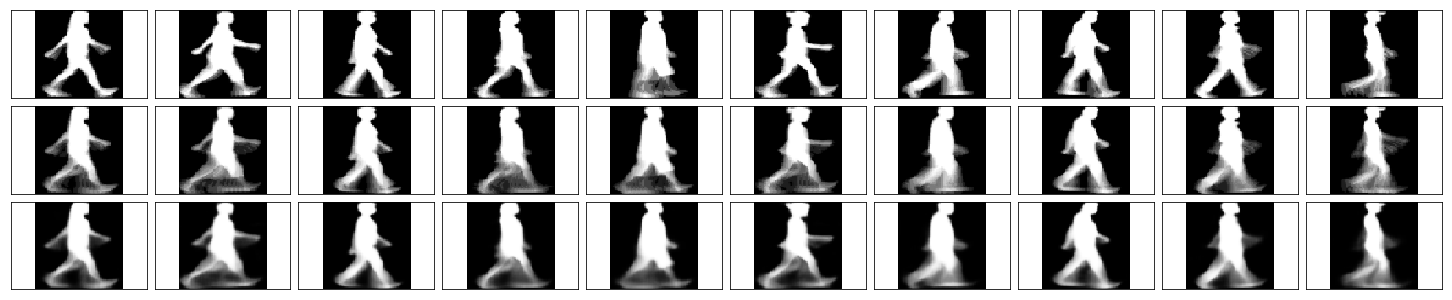

In [14]:
loaded_graph = tf.Graph()
save_model_path = './checkpoints_view_invariant/choosed/5to10_add-more-data_lr=0.0003_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
        # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
    test_inputs = loaded_graph.get_tensor_by_name('inputs_targets/inputs_1:0')
    test_targets = loaded_graph.get_tensor_by_name('inputs_targets/targets_1:0')
    test_training = loaded_graph.get_tensor_by_name('training:0')
    test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

    test_decoded = loaded_graph.get_tensor_by_name('output_layer/decoded:0')
    test_MSE= loaded_graph.get_tensor_by_name('MSE:0')

#     test_mse = []
#     test_acc = []
#     mean_test_mse = 0
#     mean_test_acc = 0

#     for ii, (test_batch, test_target_batch) in enumerate(get_batches(
#                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
#                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):
#     im = np.reshape(imresize(imread('./OULP-C1V2_Pack/Samples/0000059_85_GEI_1f.png'), [64,64],  interp='nearest'), [1,64,64,1])
    in_imgs = test_x[1000:1010]
    feed_dict = {test_inputs: in_imgs,
                         test_training: 1,
                         test_training:True
                        }

    test_decoded_img = sess.run(test_decoded, feed_dict=feed_dict)
#     imsave('./OULP-C1V2_Pack/Samples/pred_1f_2.png', np.reshape(test_decoded_img, [64,64]))
    for ii, p_img in enumerate(test_decoded_img):
        imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/predicted/{}.png'.format(ii+1), np.reshape(p_img, [64,64]))
        
    fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))

    target_imgs = test_y[1000:1010]
                    
                    # plot out
    for images, row in zip([in_imgs, target_imgs, test_decoded_img], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)


    fig.tight_layout(pad=0.1)
#     for idx, pred_img in enumerate(test_decoded_img):
#         imsave('./OULP-C1V2_Pack/Samples/pred_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
        
#     for idx, pred_img in enumerate(test_x[10:20]):
#         imsave('./OULP-C1V2_Pack/Samples/test_x_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
        
#     for idx, pred_img in enumerate(test_y[10:20]):
#         imsave('./OULP-C1V2_Pack/Samples/test_y_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
#     save_decoded(test_decoded_img, New_folder_path, ii)

#     test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

#     test_mse.append(test_mean_squared_error)
#     test_acc.append(test_ACC)


<br><br><br><br><br><br><br><br><br>